In [1]:
#Importacoes
#!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dicionario = pd.read_csv('DIC_Quantidade_de_alunos_estrangeiros_por_nacionalidade.csv', sep=';')
estrangeiros_2019 = pd.read_csv(r'C:\Users\miria\Documents\Univesp\TCC\VW_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_20190517.csv', sep=';')
estrangeiros_2020 = pd.read_csv(r'C:\Users\miria\Documents\Univesp\TCC\VW_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_31012020.csv', sep=';')
estrangeiros_2021 = pd.read_csv(r'C:\Users\miria\Documents\Univesp\TCC\VW_MENSAL_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_31032021.csv', sep=';')
#estrangeiros_2022 = pd.read_csv(r'C:\Users\miria\Documents\Univesp\TCC\Estrangeiros_por_nacionalidade_2022_1.csv', sep=';')

In [3]:
#Colocando o ano e juntando os dataframes

estrangeiros_2019['ANO']='2019'
estrangeiros_2020['ANO']='2020'
estrangeiros_2021['ANO']='2021'

df_aux = pd.concat([estrangeiros_2019, estrangeiros_2020])
df_alunos_estrangeiros = pd.concat([df_aux, estrangeiros_2021])
df_alunos_estrangeiros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30659 entries, 0 to 12448
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NOMEDEP    30659 non-null  object 
 1   DE         30659 non-null  object 
 2   DISTR      30659 non-null  object 
 3   MUN        30659 non-null  object 
 4   TIPOESC    30659 non-null  int64  
 5   COD_ESC    30659 non-null  int64  
 6   NOMESC     30659 non-null  object 
 7   DS_PAIS    30659 non-null  object 
 8   Nº alunos  9010 non-null   float64
 9   ANO        30659 non-null  object 
 10  Nº ALUNOS  21649 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.8+ MB


In [4]:
#Juntando valores das colunas N° alunos em 'QTD_ALUNOS'

df_alunos_estrangeiros['Nº alunos']=df_alunos_estrangeiros['Nº alunos'].fillna(0)
df_alunos_estrangeiros['Nº ALUNOS']=df_alunos_estrangeiros['Nº ALUNOS'].fillna(0)

df_alunos_estrangeiros['QTD_ALUNOS']=df_alunos_estrangeiros['Nº alunos']+df_alunos_estrangeiros['Nº ALUNOS']
df_alunos_estrangeiros.drop(['Nº alunos', 'Nº ALUNOS'], axis = 1, inplace=True)
df_alunos_estrangeiros

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,ANO,QTD_ALUNOS
0,ESTADUAL - OUTROS,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,27,45949,CAMPINAS COLEGIO TECNICO DE - UNICAMP,França,2019,1.0
1,ESTADUAL - OUTROS,CENTRO OESTE,RAPOSO TAVARES,SAO PAULO,11,438820,RAPOSO TAVARES ETEC,Argentina,2019,1.0
2,ESTADUAL - OUTROS,CENTRO SUL,BELA VISTA,SAO PAULO,11,299364,MARIA AUGUSTA SARAIVA DRA ETEC,Bolívia,2019,2.0
3,ESTADUAL - OUTROS,SOROCABA,SOROCABA,SOROCABA,11,16354,RUBENS DE FARIA E SOUZA ETEC,Peru,2019,1.0
4,ESTADUAL - OUTROS,TAUBATE,CACAPAVA,CACAPAVA,11,14308,MACHADO DE ASSIS ETEC,Portugal,2019,1.0
...,...,...,...,...,...,...,...,...,...,...
12444,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,14,111880,SESI 023 CENTRO EDUCACIONAL,Portugal,2021,2.0
12445,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116497,ADVENTISTA DE VOTUPORANGA COLEGIO,Japão,2021,3.0
12446,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116506,VOTUPORANGUENSE DE ENSINO ESCOLA,Japão,2021,1.0
12447,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,40,269001,IRMA ELVIRA CENTRO DE EDUCACAO INFANTIL,Venezuela,2021,1.0


In [5]:
#Convertendo para String:
df_alunos_estrangeiros['TIPOESC']=df_alunos_estrangeiros['TIPOESC'].astype(str)
df_alunos_estrangeiros['COD_ESC']=df_alunos_estrangeiros['COD_ESC'].astype(str)
df_alunos_estrangeiros['QTD_ALUNOS']=df_alunos_estrangeiros['QTD_ALUNOS'].astype(int)
df_alunos_estrangeiros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30659 entries, 0 to 12448
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOMEDEP     30659 non-null  object
 1   DE          30659 non-null  object
 2   DISTR       30659 non-null  object
 3   MUN         30659 non-null  object
 4   TIPOESC     30659 non-null  object
 5   COD_ESC     30659 non-null  object
 6   NOMESC      30659 non-null  object
 7   DS_PAIS     30659 non-null  object
 8   ANO         30659 non-null  object
 9   QTD_ALUNOS  30659 non-null  int32 
dtypes: int32(1), object(9)
memory usage: 2.5+ MB


C:\Users\miria\AppData\Local\Temp\ipykernel_10824\224038044.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qtd_alunos_ano = pd.DataFrame(df_alunos_estrangeiros.groupby('ANO').sum()['QTD_ALUNOS']).reset_index()


[Text(0, 0, '19786'), Text(0, 0, '18622'), Text(0, 0, '25127')]

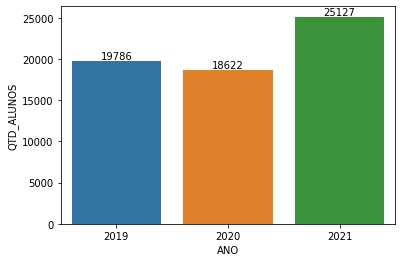

In [6]:
#Ano
qtd_alunos_ano = pd.DataFrame(df_alunos_estrangeiros.groupby('ANO').sum()['QTD_ALUNOS']).reset_index()
ax = sns.barplot(data= qtd_alunos_ano, y='QTD_ALUNOS', x='ANO')
ax.bar_label(ax.containers[0])

In [7]:
alunos_por_pais = pd.DataFrame(df_alunos_estrangeiros.groupby(['DS_PAIS'])\
    .count()['QTD_ALUNOS'])\
    .sort_values(by='QTD_ALUNOS', ascending=False)\
    .reset_index()

alunos_por_pais

,DS_PAIS,QTD_ALUNOS
0,Bolívia,4537
1,Venezuela,3981
2,Japão,3733
3,Haiti,2947
4,Colômbia,1645
...,...,...
169,Brunei,1
170,Oman,1
171,Níger,1
172,Namíbia,1


In [40]:
alunos_por_pais_ano = pd.DataFrame(df_alunos_estrangeiros.groupby(['DS_PAIS','ANO'])\
    .count()['QTD_ALUNOS'])\
    .sort_values(by='QTD_ALUNOS', ascending=False)\
    .reset_index()

alunos_por_pais_ano.sort_values(by=['DS_PAIS', 'ANO'])

,DS_PAIS,ANO,QTD_ALUNOS
444,Afeganistão,2019,1
246,Afeganistão,2020,4
185,Afeganistão,2021,7
243,Albânia,2019,4
363,Albânia,2020,1
...,...,...,...
266,"Åland, Ilhas",2020,3
210,"Åland, Ilhas",2021,5
143,Índia,2019,14
170,Índia,2020,9


In [13]:
print(df_alunos_estrangeiros['DS_PAIS'].unique())

['França' 'Argentina' 'Bolívia' 'Peru' 'Portugal' 'Japão' 'Venezuela'
 'Equador' 'Espanha' 'Haiti' 'Paraguai' 'Chile' 'Angola' 'Colômbia'
 'Marrocos' 'Tanzânia' 'Uruguai' 'Guiné-Conacri' 'México' 'Itália'
 'Líbano' 'Libéria' 'Serra Leoa' 'Cuba' 'Nova Zelândia (Aotearoa)'
 'Costa do Marfim' 'Países Baixos (Holanda)' 'Roménia' 'Rússia' 'Ucrânia'
 'Luxemburgo' 'Suriname' 'Alemanha'
 'Reino Unido da Grã-Bretanha e Irlanda do Norte' 'Austrália' 'Moçambique'
 'Turquia' 'Israel' 'Grécia' 'Estados Unidos da América' 'Filipinas'
 'África do Sul' 'Croácia' 'Namíbia' 'Paquistão' 'China'
 'Dominicana, República' 'Camarões' 'Nigéria' 'Tunísia' 'Burundi'
 'Noruega' 'Sérvia' 'Índia' 'Honduras' 'Jamaica' 'Síria' 'Arménia'
 'Guiné-Bissau' 'Senegal' 'São Vicente e Granadinas' 'Hong Kong' 'Bahrain'
 'Qatar' 'Bangladesh' 'Guatemala' 'Zâmbia' 'Guiné Equatorial' 'Vietname'
 'Afeganistão' 'Finlândia' 'Gana' 'Hungria' 'Costa Rica' 'Cabo Verde'
 'Eslovénia' 'Congo, República Democrática do (antigo Zaire)' 'Can

In [10]:
#Regioes paises
europa = ['França','Portugal', 'Espanha', 'Itália','Países Baixos (Holanda)', 'Roménia', 'Rússia' ,'Ucrânia', 'Luxemburgo',
'Alemanha','Reino Unido da Grã-Bretanha e Irlanda do Norte','Turquia','Grécia','Croácia','Noruega', 'Sérvia','Finlândia',
'Hungria','Eslovénia','Bélgica','Suíça','Bósnia-Herzegovina','Checa, República','Islândia' ,'Irlanda','Andorra','Åland, Ilhas',
'Malta','Suécia','Svalbard e Jan Mayen','Letónia','Polónia', 'Bulgária','Áustria','Vaticano','Albânia','Dinamarca','Eslováquia',
'Bielo-Rússia','Lituânia','Mónaco','Geórgia','Jersey','Estónia','Montenegro']

america_sul=['Argentina', 'Bolívia', 'Peru', 'Venezuela', 'Equador','Paraguai', 'Chile', 'Colômbia','Uruguai','Suriname','Brasil',
'Guiana','Guiana Francesa','Aruba', 'Malvinas, Ilhas (Falkland)',]

america_central=['Haiti','Cuba','Dominicana, República','Honduras' ,'Jamaica','Guatemala','Costa Rica','El Salvador','Panamá',
'Nicarágua','Porto Rico']

america_norte=['México','Estados Unidos da América','São Vicente e Granadinas','Canadá','Antigua e Barbuda',
'Saint Pierre et Miquelon', 'Martinica','Bermuda','Gronelândia','Virgens Britânicas, Ilhas','Belize','Virgens Americanas, Ilhas',
'Grenada','Cayman, Ilhas','Barbados','Montserrat']

africa=['Angola', 'Marrocos' ,'Tanzânia','Guiné-Conacri','Libéria' ,'Serra Leoa','Costa do Marfim','Moçambique','África do Sul',
'Namíbia','Camarões' ,'Nigéria' ,'Tunísia', 'Burundi','Guiné-Bissau' ,'Senegal','Zâmbia','Guiné Equatorial','Gana','Cabo Verde',
'Congo, República Democrática do (antigo Zaire)','Líbia' ,'Togo','Egipto','Argélia','Congo, República do','Djibouti',
'Burkina Faso','Uganda','Centro-africana, República','Gâmbia', 'Tonga','Níger','Madagáscar','Mali','Benin', 'Botswana','Chade',
'Etiópia','São Tomé e Príncipe','Malawi','Comores']

asia=['Japão','Líbano','Israel','Filipinas','Paquistão', 'China','Índia','Síria','Arménia','Hong Kong','Bahrain','Qatar',
'Bangladesh','Vietname','Afeganistão', 'Iraque', 'Jordânia','Cambodja','Iémen','Palestina','Irão','Arábia Saudita',
'Emiratos Árabes Unidos','Laos','Indonésia' ,'Singapura','Malásia', 'Azerbeijão','Tailândia','Sri Lanka','Macau','Butão' ,'Brunei',
'Oman','Usbequistão']

oceania = ['Nova Zelândia (Aotearoa)','Austrália','Coreia do Sul','Cazaquistão',
'Coreia, República Democrática da (Coreia do Norte)','Kiribati','Fiji','Samoa (Samoa Ocidental)', 'Polinésia Francesa','Toquelau']

print(len(europa)+len(america_norte)+len(america_central)+len(america_sul)+len(africa)+len(asia)+len(oceania))

174


In [12]:
df_alunos_estrangeiros['DS_PAIS'].isna().sum()

0

In [29]:
dic_regiao = {}
regiao = []

for pais in df_alunos_estrangeiros['DS_PAIS']:
    for elemento in europa:
        if pais == elemento:
            regiao.append('Europa')
            
    for elemento in america_central:
        if pais == elemento:
            regiao.append('America Central')

    for elemento in africa:
        if pais == elemento:
            regiao.append('Africa')
            
    for elemento in america_sul:
        if pais == elemento:
            regiao.append('America do Sul')

    for elemento in asia:
        if pais == elemento:
            regiao.append('Asia')
            
    for elemento in america_norte:
        if pais == elemento:
             regiao.append('America do Norte')

    for elemento in oceania:
        if pais == elemento:
            regiao.append('Oceania')

df_alunos_estrangeiros['Regiao'] = regiao
    

In [30]:
df_alunos_estrangeiros

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,ANO,QTD_ALUNOS,Regiao
0,ESTADUAL - OUTROS,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,27,45949,CAMPINAS COLEGIO TECNICO DE - UNICAMP,França,2019,1,Europa
1,ESTADUAL - OUTROS,CENTRO OESTE,RAPOSO TAVARES,SAO PAULO,11,438820,RAPOSO TAVARES ETEC,Argentina,2019,1,America do Sul
2,ESTADUAL - OUTROS,CENTRO SUL,BELA VISTA,SAO PAULO,11,299364,MARIA AUGUSTA SARAIVA DRA ETEC,Bolívia,2019,2,America do Sul
3,ESTADUAL - OUTROS,SOROCABA,SOROCABA,SOROCABA,11,16354,RUBENS DE FARIA E SOUZA ETEC,Peru,2019,1,America do Sul
4,ESTADUAL - OUTROS,TAUBATE,CACAPAVA,CACAPAVA,11,14308,MACHADO DE ASSIS ETEC,Portugal,2019,1,Europa
...,...,...,...,...,...,...,...,...,...,...,...
12444,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,14,111880,SESI 023 CENTRO EDUCACIONAL,Portugal,2021,2,Europa
12445,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116497,ADVENTISTA DE VOTUPORANGA COLEGIO,Japão,2021,3,Asia
12446,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116506,VOTUPORANGUENSE DE ENSINO ESCOLA,Japão,2021,1,Asia
12447,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,40,269001,IRMA ELVIRA CENTRO DE EDUCACAO INFANTIL,Venezuela,2021,1,America do Sul


[Text(0, 0, '49.1'),
 Text(0, 0, '30.2'),
 Text(0, 0, '19.9'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0')]

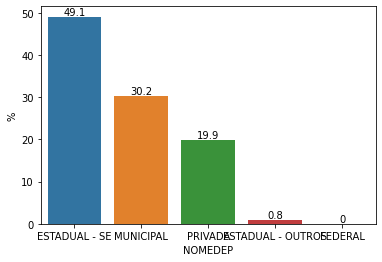

In [49]:
alunos_por_tipo_escola = pd.DataFrame(df_alunos_estrangeiros.groupby('NOMEDEP')\
    .count()['QTD_ALUNOS'])\
    .sort_values(by='QTD_ALUNOS', ascending=False)\
    .reset_index()

total = alunos_por_tipo_escola.QTD_ALUNOS.sum()
alunos_por_tipo_escola['%']=alunos_por_tipo_escola['QTD_ALUNOS'].apply(lambda x: ((x/total)*100).round(1))
ax = sns.barplot(data= alunos_por_tipo_escola, y='%', x='NOMEDEP')
ax.bar_label(ax.containers[0])

[Text(0, 0, '15045'),
 Text(0, 0, '9261'),
 Text(0, 0, '6092'),
 Text(0, 0, '257'),
 Text(0, 0, '4')]

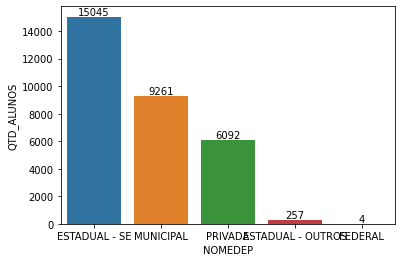